### Imports

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import OneRClassifier
import time
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Loading and preprocessing images

In [3]:
dataset_path = "Cat_Breed"
unseen_dataset_path = "Unseen_Cat_Breed"

breeds = {
    'Abyssinian': 0, 'Bombay': 1, 'Egyptian Mau': 2, 'Exotic Shorthair': 3,
    'Himalayan': 4, 'Maine Coon': 5, 'Regdoll': 6, 'Russian Blue': 7,
    'Scottish Fold': 8, 'Siamese': 9, 'Sphynx': 10
}

img_size = (64, 64)

def load_and_preprocess_images(directory, label, img_size):
    images, labels = [], []
    if not os.path.exists(directory):
        print(f"Warning: {directory} does not exist. Skipping...")
        return images, labels
    
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)      
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img / 255.0
            images.append(img.flatten())
            labels.append(label)
    return images, labels

X, y = [], []
for breed, label in breeds.items():
    images, labels = load_and_preprocess_images(os.path.join(dataset_path, breed), label, img_size)
    X.extend(images)
    y.extend(labels)

X, y = np.array(X), np.array(y)

print(f"Loaded {len(X)} training images from {len(breeds)} classes.")

Loaded 4950 training images from 11 classes.


### Splitting Train and Test Images

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training of Models

In [5]:
decision_tree_classifier = DecisionTreeClassifier()
naive_bayes_classifier = GaussianNB()
svm_classifier = SVC(probability=True)
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [6]:
def train_model(model, name):
    start_time = time.time() 
    model.fit(X_train, y_train)
    end_time = time.time() 
    training_time = end_time - start_time 
    print(f"{name} trained in {training_time:.4f} seconds.")


In [7]:
train_model(decision_tree_classifier, "Decision Tree")

Decision Tree trained in 14.5580 seconds.


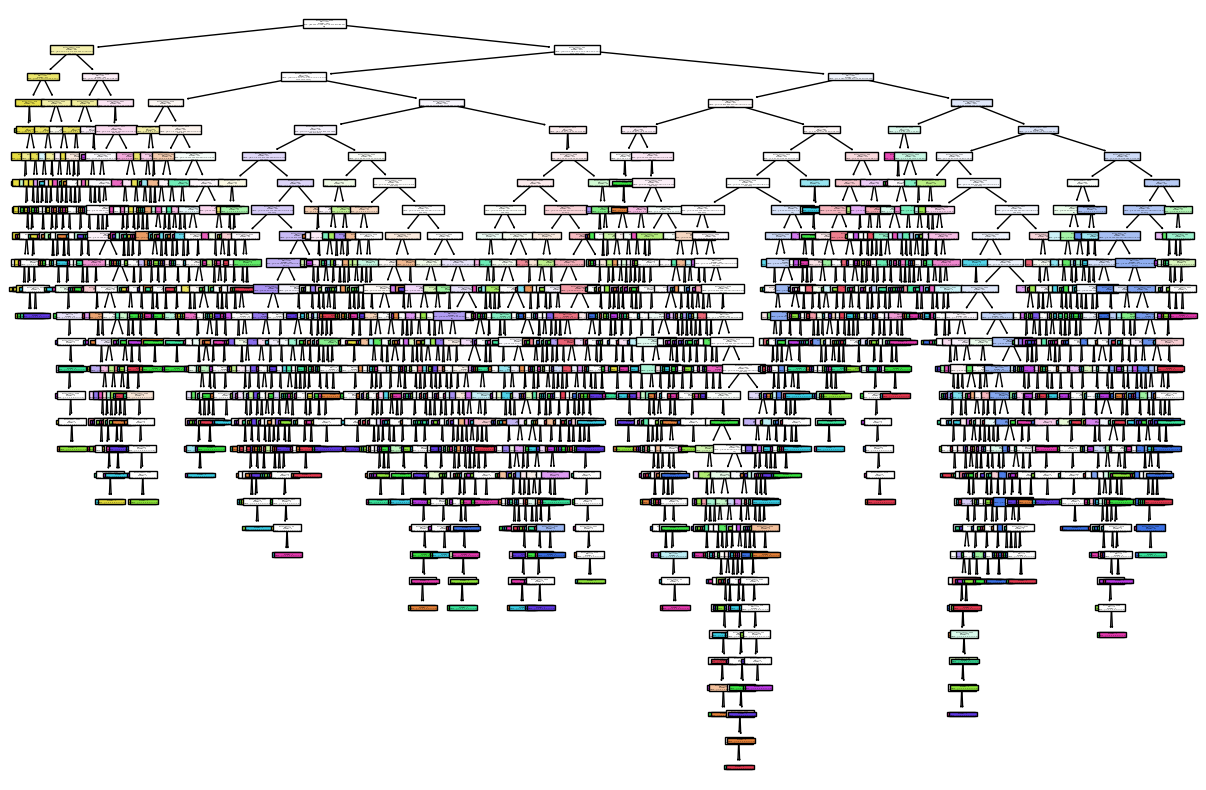

In [8]:
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=[f'Feature_{i}' for i in range(X.shape[1])])
plt.show()

In [9]:
train_model(naive_bayes_classifier, "Naive Bayes")

Naive Bayes trained in 0.1609 seconds.


In [10]:
train_model(svm_classifier, "SVM Classifier")

SVM Classifier trained in 92.5189 seconds.


In [11]:
train_model(random_forest_classifier, "Random Forest Classifier")

Random Forest Classifier trained in 15.9444 seconds.


### Model Metrics

In [14]:
def check_model_metrics(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else None
    cm = confusion_matrix(y_test, y_pred)

    cross_val = cross_val_score(model, X_train, y_train, cv=10).mean()

    print(f"{name} Metrics")
    print(f"Confusion Metrix: {cm}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC-AUC: {roc_auc}")


In [15]:
check_model_metrics(naive_bayes_classifier, "Naive Bayes")

Naive Bayes Metrics
Confusion Metrix: [[38  4  1  2  0  2  3 31  6  4  6]
 [ 1 84  0  3  0  0  0  4  0  6  0]
 [28  2  2  2  1  8 10 18  1  5 13]
 [21  4  3  2  2 14 24 12 10  2  7]
 [16  4  3  3  6  9 11  7  3  4 11]
 [17  8  0  3  0 19 18 17  2  3  8]
 [ 5  0  1  1  1 16 46  1  1  0  6]
 [25  7  1  2  1  5  8 21  3  3 16]
 [22  3  0  0  2 10 33  8  4  3  9]
 [24  2  3  0  3  5  3 14  0 20  9]
 [18  0  2  2  1 10 18 10  2  3 19]]
Accuracy: 0.2636363636363636
Precision: 0.24907324836624414
Recall: 0.2636363636363636
ROC-AUC: 0.6760911712265177


In [ ]:
check_model_metrics(random_forest_classifier, "Random Forest Classifier")

In [ ]:
check_model_metrics(svm_classifier, "SVM Classifier")